In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [73]:
df = pd.read_csv('Datasets/major-tech-stock-2019-2024.csv')

In [74]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
1652,2020-07-27,201.470001,203.970001,200.860001,203.850006,196.803177,30160900,MSFT
5025,2023-12-20,138.970001,141.699997,138.070007,138.339996,138.181412,49107200,GOOGL
3821,2019-03-12,59.115002,60.285500,59.115002,59.862499,59.793873,42220000,GOOGL
1111,2023-06-01,177.699997,180.119995,176.929993,180.089996,179.138626,68901800,AAPL
1291,2019-02-20,107.860001,107.940002,106.290001,107.150002,101.811630,21607700,MSFT
4489,2021-11-02,144.579498,146.608994,144.335495,145.432495,145.265778,33482000,GOOGL
1509,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.412079,18369400,MSFT
2518,2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000,AMZN
1044,2023-02-24,147.110001,147.190002,145.720001,146.710007,145.733398,55469600,AAPL
1967,2021-10-25,309.359985,309.399994,306.459991,308.130005,300.933685,17554500,MSFT


In [75]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker']

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6290 non-null   object 
 1   Open       6290 non-null   float64
 2   High       6290 non-null   float64
 3   Low        6290 non-null   float64
 4   Close      6290 non-null   float64
 5   Adj Close  6290 non-null   float64
 6   Volume     6290 non-null   int64  
 7   Ticker     6290 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.3+ KB


In [77]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03
mean,151.162151,153.244131,149.026081,151.204223,149.758827,7.490120e+07
std,80.989939,82.186810,79.665983,80.943887,80.144988,6.252449e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,8.989200e+06
25%,93.082499,94.356625,91.825003,93.113749,92.949377,3.114190e+07
50%,137.934746,139.455002,136.264999,137.790001,136.450951,5.853630e+07
75%,193.560001,196.315006,190.919998,193.577503,192.476280,9.604528e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [78]:
print("Null Values", df.isnull().sum().sum())

Null Values 0


In [79]:
print("Duplicate Values", df.duplicated().sum())

Duplicate Values 0


In [80]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("there's no column of date in df")

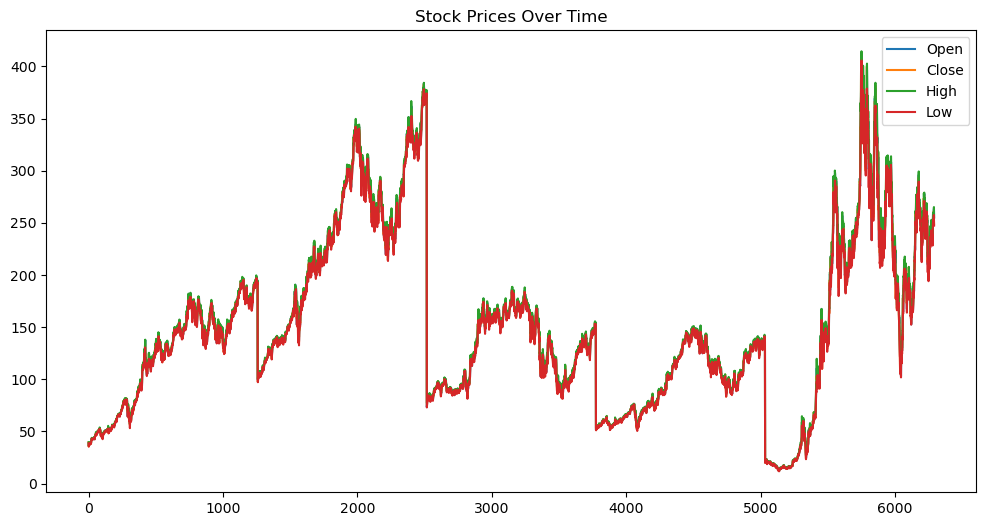

In [81]:
df[['Open', 'Close', 'High', 'Low']].plot(figsize=(12, 6))
plt.title('Stock Prices Over Time')
plt.show()

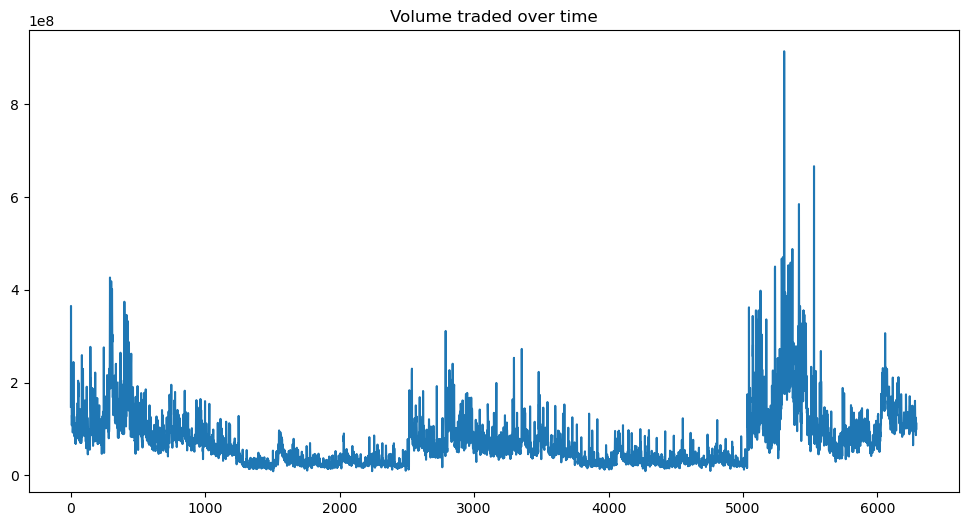

In [82]:
df['Volume'].plot(figsize=(12,6))
plt.title("Volume traded over time")
plt.show()

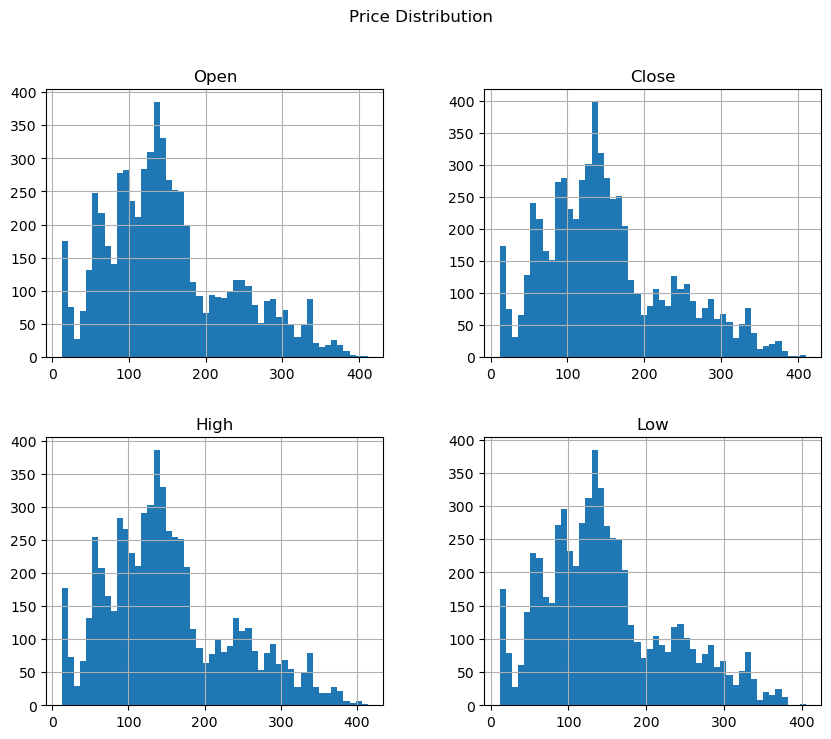

In [83]:
df[['Open','Close','High','Low']].hist(figsize=(10,8), bins=50)
plt.suptitle("Price Distribution")
plt.show()

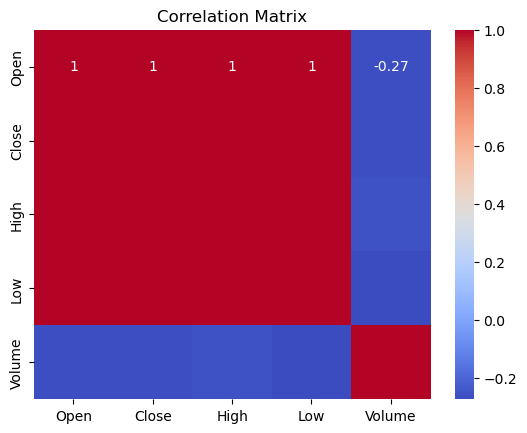

In [84]:
corr = df[['Open','Close','High','Low','Volume']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

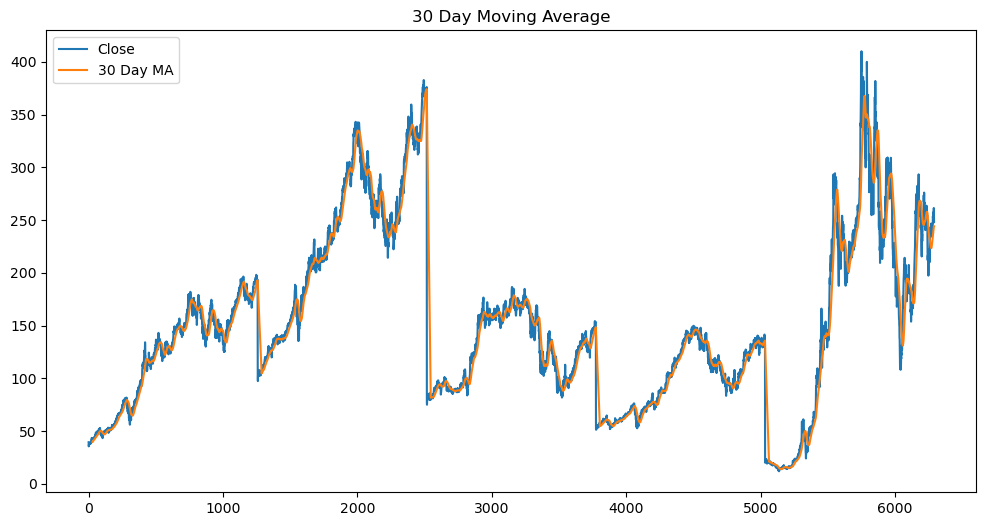

In [85]:
df['30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close', '30 Day MA']].plot(figsize=(12,6))
plt.title('30 Day Moving Average')
plt.show()

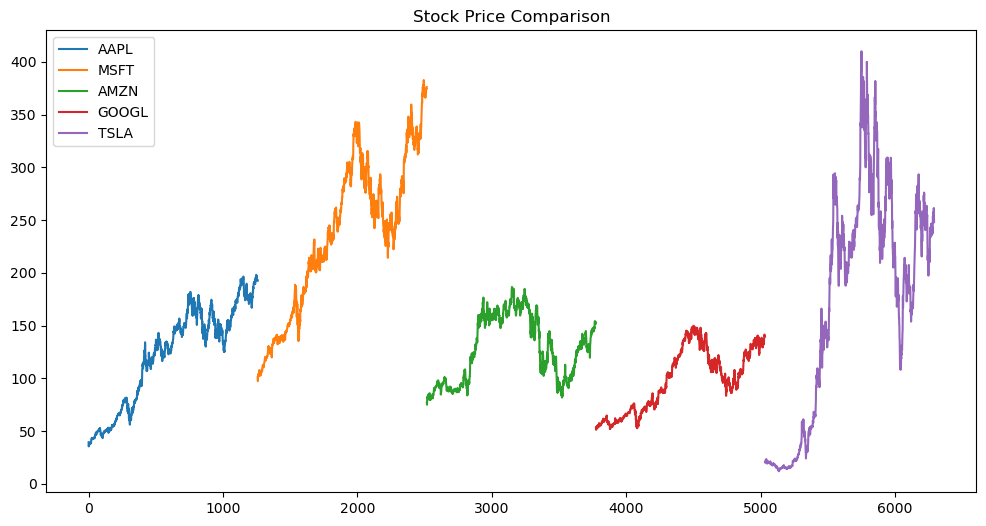

In [88]:
plt.figure(figsize=(12, 6))

tickers = df['Ticker'].unique()
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.plot(df_ticker['Close'], label=ticker)

plt.title('Stock Price Comparison')
plt.legend()
plt.show()